In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.DataFrame({'Height':['Bottom','Bottom','Bottom','Bottom','Middle','Middle','Middle','Middle','Top','Top','Top','Top'],
                             'Width':['Regular','Regular','Wide','Wide','Regular','Regular','Wide','Wide','Regular','Regular','Wide','Wide'],
                           'sales':[47,43,46,40,62,68,67,71,41,39,42,46]})
data

,Height,Width,sales
0,Bottom,Regular,47
1,Bottom,Regular,43
2,Bottom,Wide,46
3,Bottom,Wide,40
4,Middle,Regular,62
5,Middle,Regular,68
6,Middle,Wide,67
7,Middle,Wide,71
8,Top,Regular,41
9,Top,Regular,39


In [3]:
bakery_data=data.groupby(['Height','Width']).sales.mean().reset_index().pivot(columns='Width',index='Height',values='sales')
bakery_data

Width,Regular,Wide
Height,,
Bottom,45,43
Middle,65,69
Top,40,44


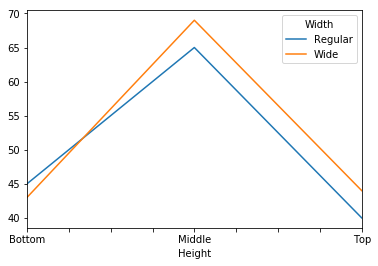

In [4]:
bakery_data.plot()

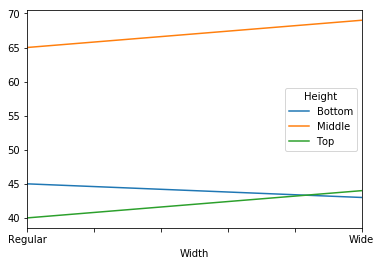

In [5]:
bakery_data.T.plot()

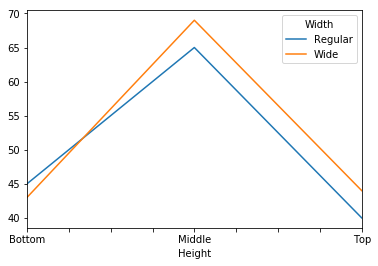

In [6]:
bakery_data.plot()

In [7]:
common_mean = 51
height_effect = data.groupby('Height').sales.mean() - common_mean
height_effect = height_effect.to_frame()
height_effect

,sales
Height,
Bottom,-7
Middle,16
Top,-9


In [8]:
width_effect = data.groupby('Width').sales.mean() - common_mean
width_effect = width_effect.to_frame()
width_effect

,sales
Width,
Regular,-1
Wide,1


In [9]:
interaction_effect = bakery_data - (common_mean + height_effect.T.values + width_effect.values).T
interaction_effect

Width,Regular,Wide
Height,,
Bottom,2,-2
Middle,-1,1
Top,-1,1


In [10]:
residual_effect = data.sales - (common_mean + height_effect.T.values + width_effect.values + interaction_effect.T.values).T.ravel().repeat(2)
residual_effect_sqr = residual_effect ** 2
residual_effect_sqr_sum = residual_effect_sqr.sum() 
residual_effect_df = 6
residual_effect_MS = residual_effect_sqr_sum / residual_effect_df
print('residual effect MS : {:.1f}'.format(residual_effect_MS))


residual effect MS : 10.3


In [11]:
common_mean_sqr = common_mean ** 2
common_mean_sqr_sum = common_mean_sqr * len(data)
common_mean_sqr_sum
common_mean_df = 1
common_mean_MS = common_mean_sqr_sum / common_mean_df
common_mean_F_ratio = common_mean_MS / residual_effect_MS
print('common Fratio : {:.2f}'.format(common_mean_F_ratio))

common Fratio : 3020.52


In [12]:
height_effect_sqr = height_effect.values.repeat(4) ** 2
height_effect_sqr_sum = height_effect_sqr.sum()
height_effect_df = 2
height_effect_MS = height_effect_sqr_sum / height_effect_df
height_effect_F_ratio = height_effect_MS / residual_effect_MS
height_pvalue = stats.f.sf(height_effect_F_ratio,height_effect_df,residual_effect_df)
print('Height p-value : {:.4f}'.format(height_pvalue))

Height p-value : 0.0001


In [13]:
width_effect_sqr = width_effect.values.repeat(6) ** 2
width_effect_sqr_sum = width_effect_sqr.sum()
width_effect_df = 1
width_effect_MS = width_effect_sqr_sum / width_effect_df
width_effect_F_ratio = width_effect_MS / residual_effect_MS
width_pvalue = stats.f.sf(width_effect_F_ratio,width_effect_df,residual_effect_df)
print('width p-value : {:.4f}'.format(width_pvalue))

width p-value : 0.3226


In [14]:
interaction_effect_sqr = interaction_effect.values.repeat(2) ** 2
interaction_effect_sqr_sum = interaction_effect_sqr.sum()
interaction_effect_df = 2
interaction_effect_MS = interaction_effect_sqr_sum / interaction_effect_df
interaction_effect_F_ratio = interaction_effect_MS / residual_effect_MS
interaction_pvalue = stats.f.sf(interaction_effect_F_ratio,interaction_effect_df,residual_effect_df)
print('width p-value : {:.4f}'.format(interaction_pvalue))

width p-value : 0.3747


In [15]:
data.groupby(['Height','Width']).sales.describe()

count  mean       std   min   25%   50%   75%   max
Height Width                                                       
Bottom Regular    2.0  45.0  2.828427  43.0  44.0  45.0  46.0  47.0
       Wide       2.0  43.0  4.242641  40.0  41.5  43.0  44.5  46.0
Middle Regular    2.0  65.0  4.242641  62.0  63.5  65.0  66.5  68.0
       Wide       2.0  69.0  2.828427  67.0  68.0  69.0  70.0  71.0
Top    Regular    2.0  40.0  1.414214  39.0  39.5  40.0  40.5  41.0
       Wide       2.0  44.0  2.828427  42.0  43.0  44.0  45.0  46.0

In [16]:
model = ols('sales ~ Height + Width + Height:Width', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Height,2.0,1544.0,772.000000,74.709677,0.000058
Width,1.0,12.0,12.000000,1.161290,0.322605
Height:Width,2.0,24.0,12.000000,1.161290,0.374697
Residual,6.0,62.0,10.333333,NaN,NaN
